In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
raw_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/ttc_inhalation/data/interim/'
figures_dir = '/home/grace/Documents/python/ttc_inhalation/reports/figures/'

In [4]:
ls

01_ToxVal_processing.ipynb          05_TTC_derivation_Cramer.ipynb
02_Kroes_processed.ipynb            06_Carthew_Escher.ipynb
03_chemprop_alerts.ipynb            Nelms_TTC.R*
04_subsetting_for_inhalation.ipynb  TTC_inhalation.ipynb*


In [5]:
ttc = pd.read_csv(raw_dat_dir+'ToxVal_filtered_Inhal_Cramer.csv')

In [6]:
ttc.shape

(2594, 178)

In [7]:
ttc.drop(['Unnamed: 168', 'Unnamed: 169', 'Unnamed: 170', 'Unnamed: 171',
       'Unnamed: 172', 'Unnamed: 173', 'Unnamed: 174', 'Unnamed: 175',
       'Unnamed: 176', 'Unnamed: 177'], axis = 1, inplace = True)

In [8]:
ttc = ttc[ttc.columns.tolist()[0:60]]

In [10]:
ttc.DTXSID.nunique()

490

In [16]:
import glob

In [21]:
all_cramer = pd.DataFrame()
for f in glob.glob(processed_dat_dir+'Class*mgm3.csv'):
    df = pd.read_csv(f)
    df['filename'] = f
    all_cramer = all_cramer.append(df,  ignore_index=True)

In [22]:
all_cramer.head()

,Unnamed: 0,DTXSID,min_toxval_mgm3_adj,filename
0,0,DTXSID0020315,0.005000,/home/grace/Documents/python/ttc_inhalation/da...
1,1,DTXSID0020446,0.683333,/home/grace/Documents/python/ttc_inhalation/da...
2,2,DTXSID0021096,9.800000,/home/grace/Documents/python/ttc_inhalation/da...
3,3,DTXSID0021381,550.382960,/home/grace/Documents/python/ttc_inhalation/da...
4,4,DTXSID0021383,24.750000,/home/grace/Documents/python/ttc_inhalation/da...


In [23]:
all_cramer.shape

(519, 4)

In [26]:
all_cramer.filename.unique()

array(['/home/grace/Documents/python/ttc_inhalation/data/processed/ClassIII_rep_mgm3.csv',
       '/home/grace/Documents/python/ttc_inhalation/data/processed/ClassI_rep_mgm3.csv',
       '/home/grace/Documents/python/ttc_inhalation/data/processed/ClassII_rep_mgm3.csv'],
      dtype=object)

In [27]:
import re

In [ ]:
re.compile('Page.\d{1,}.of.\d{1,}')

In [ ]:
[m.group(0) for l in content_new for m in [regex.search(l)] if m] 

In [39]:
regex= re.compile('Class\w{3,}')

In [41]:
filenames =[m.group(0) for l in all_cramer['filename'] for m in [regex.search(l)] if m]

In [45]:
classes= [e.split('_')[0] for e in filenames]

In [47]:
all_cramer['Cramer_class'] = classes

In [49]:
all_cramer.drop(['Unnamed: 0','filename'],axis = 1, inplace = True)

In [50]:
all_cramer.head()

,DTXSID,min_toxval_mgm3_adj,Cramer_class
0,DTXSID0020315,0.005000,ClassIII
1,DTXSID0020446,0.683333,ClassIII
2,DTXSID0021096,9.800000,ClassIII
3,DTXSID0021381,550.382960,ClassIII
4,DTXSID0021383,24.750000,ClassIII


In [54]:
moa_tb = pd.read_excel(processed_dat_dir+'Cramer_4TB_out.xlsx')

In [55]:
moa_tb.head()

,CAS Number,Chemical name(s),SMILES,Molecular Formula,Predefined substance type,Additional Ids,Composition,CAS Smiles relation,Acute aquatic toxicity MOA by OASIS,Acute aquatic toxicity classification by Verhaar (Modified)
0,No CAS number,38480;Ethylbenzene;DTXSID3020596,CCc1ccccc1,C8H10,Mono constituent,NaN,NaN,Not applicable,Basesurface narcotics,Class 1 (narcosis or baseline toxicity)
1,No CAS number,vinylbenzene;DTXSID2021284,C=Cc1ccccc1,C8H8,Mono constituent,NaN,NaN,Not applicable,Basesurface narcotics,Class 1 (narcosis or baseline toxicity)
2,No CAS number,DTXSID1020431,Clc1ccc(Cl)cc1,C6H4Cl2,Mono constituent,NaN,NaN,Not applicable,Basesurface narcotics,Class 3 (unspecific reactivity)
3,No CAS number,DTXSID1021871,Oc1ccc(Cl)cc1,C6H5ClO,Mono constituent,NaN,NaN,Not applicable,Phenols and Anilines,Class 3 (unspecific reactivity)
4,No CAS number,Acrylonitrile;DTXSID5020029,C=CC#N,C3H3N,Mono constituent,NaN,NaN,Not applicable,Reactive unspecified,Class 3 (unspecific reactivity)


In [56]:
moa_tb['DTXSID'] = moa_tb['Chemical name(s)'].str.extract(r'(DTXSID\d{1,})')

In [58]:
moa_tb = moa_tb[~moa_tb.DTXSID.isnull()]

In [59]:
moa_tb.DTXSID.nunique()

3388

In [61]:
moa_tb.drop(['CAS Number', 'Chemical name(s)', 'SMILES', 'Molecular Formula',
       'Predefined substance type', 'Additional Ids', 'Composition',
       'CAS Smiles relation' ], axis = 1, inplace= True)

In [62]:
moa_tb.head()

,Acute aquatic toxicity MOA by OASIS,Acute aquatic toxicity classification by Verhaar (Modified),DTXSID
0,Basesurface narcotics,Class 1 (narcosis or baseline toxicity),DTXSID3020596
1,Basesurface narcotics,Class 1 (narcosis or baseline toxicity),DTXSID2021284
2,Basesurface narcotics,Class 3 (unspecific reactivity),DTXSID1020431
3,Phenols and Anilines,Class 3 (unspecific reactivity),DTXSID1021871
4,Reactive unspecified,Class 3 (unspecific reactivity),DTXSID5020029


In [63]:
moa_tb.rename(columns = {'Acute aquatic toxicity MOA by OASIS' : 'Aquatic_OASIS', 'Acute aquatic toxicity classification by Verhaar (Modified)': 'Verhaar'}, inplace = True)

In [64]:
moa_tb.Verhaar.value_counts()

Class 5 (Not possible to classify according to these rules)                   1283
Class 3 (unspecific reactivity)                                               1226
Class 1 (narcosis or baseline toxicity)                                        718
Class 2 (less inert compounds)                                                  82
Class 4 (Compounds and groups of compounds acting by a specific mechanism)      77
(N/A)                                                                            2
Name: Verhaar, dtype: int64

In [65]:
moa_tb.Aquatic_OASIS.value_counts()

Reactive unspecified                  1195
Basesurface narcotics                 1145
Esters                                 535
Phenols and Anilines                   243
Narcotic Amine                         234
Alpha-, Beta-unsaturated alcochols      25
Aldehydes                               11
Name: Aquatic_OASIS, dtype: int64

In [66]:
ttc_moa = pd.merge(all_cramer, moa_tb, on = 'DTXSID', how = 'left')

In [67]:
print(all_cramer.shape)
print(ttc_moa.shape)

(519, 3)
(519, 5)


In [68]:
ttc_moa.head()

,DTXSID,min_toxval_mgm3_adj,Cramer_class,Aquatic_OASIS,Verhaar
0,DTXSID0020315,0.005000,ClassIII,Basesurface narcotics,Class 5 (Not possible to classify according to...
1,DTXSID0020446,0.683333,ClassIII,Basesurface narcotics,Class 3 (unspecific reactivity)
2,DTXSID0021096,9.800000,ClassIII,Reactive unspecified,Class 5 (Not possible to classify according to...
3,DTXSID0021381,550.382960,ClassIII,Basesurface narcotics,Class 1 (narcosis or baseline toxicity)
4,DTXSID0021383,24.750000,ClassIII,Basesurface narcotics,Class 1 (narcosis or baseline toxicity)


(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.5       , -0.43333333, -0.36666667, -0.3       , -0.23333333,
        -0.16666667, -0.1       , -0.03333333,  0.03333333,  0.1       ,
         0.16666667,  0.23333333,  0.3       ,  0.36666667,  0.43333333,
         0.5       ]),
 <a list of 15 Patch objects>)

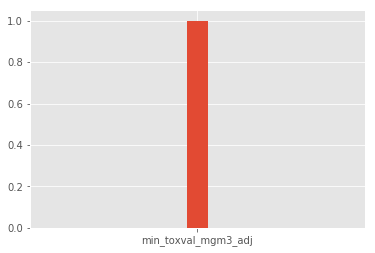

In [69]:
plt.style.use('ggplot')
plt.hist('min_toxval_mgm3_adj', bins = 15)

In [70]:
ttc_moa['log_min_toxval_mgm3_adj'] = np.log10(ttc_moa['min_toxval_mgm3_adj'])

In [72]:
ttc_moa[ttc_moa['log_min_toxval_mgm3_adj'].isnull()]

,DTXSID,min_toxval_mgm3_adj,Cramer_class,Aquatic_OASIS,Verhaar,log_min_toxval_mgm3_adj


In [77]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [79]:
from scipy.stats import norm
def make_model(sample, size=201):
    """Estimate the parameters of a Gaussian model.
    """
    mu = np.mean(sample)
    sigma = np.std(sample)
    model = norm(mu, sigma)

    xs = np.linspace(np.min(sample), np.max(sample), size)
    ys = model.cdf(xs)
    return xs, ys

<Figure size 720x648 with 0 Axes>

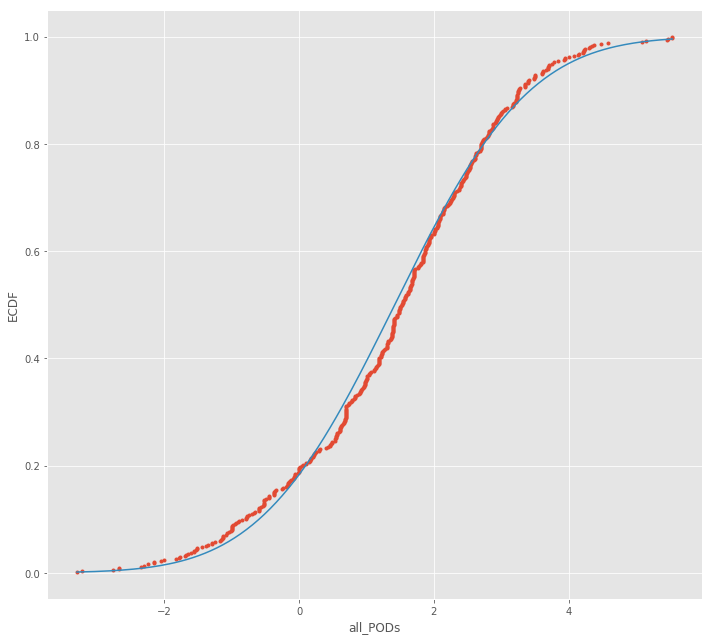

In [80]:
plt.figure(figsize = (10,9))
all_logPODs = ttc_moa['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)

cx,cy = make_model(ttc_moa['log_min_toxval_mgm3_adj'])
plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none')
plt.plot(cx, cy , linestyle = '-')
plt.xlabel('all_PODs')
plt.ylabel('ECDF')

plt.tight_layout()

In [81]:
from scipy.stats import shapiro
# seed the random number generator

# normality test
stat, p = shapiro(ttc_moa['log_min_toxval_mgm3_adj'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.005
Sample does not look Gaussian (reject H0)


In [82]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size = len(data)), 5)

In [83]:
def draw_bs_reps(data, func, size = 1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [90]:
ttc_moa.Aquatic_OASIS.value_counts()

baseline_narcotic    231
reactive             154
narcotic_amine        60
esters                56
other                 18
Name: Aquatic_OASIS, dtype: int64

In [87]:
oasis_dict = {'Basesurface narcotics' :'baseline_narcotic',  'Reactive unspecified' : 'reactive', 
             'Esters': 'esters', 'Narcotic Amine' : 'narcotic_amine', 'Alpha-, Beta-unsaturated alcochols' : 'other', 'Phenols and Anilines': 'other','Aldehydes' : 'other'}

ttc_moa['Aquatic_OASIS'] = ttc_moa.Aquatic_OASIS.map(oasis_dict)

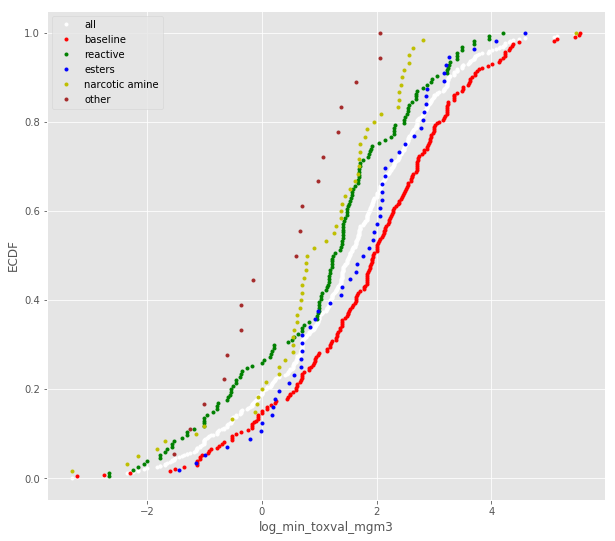

In [94]:
o1_logPODs = ttc_moa[ttc_moa['Aquatic_OASIS'] == 'baseline_narcotic']['log_min_toxval_mgm3_adj']
o2_logPODs = ttc_moa[ttc_moa['Aquatic_OASIS'] == 'reactive']['log_min_toxval_mgm3_adj']
o3_logPODs = ttc_moa[ttc_moa['Aquatic_OASIS'] == 'esters']['log_min_toxval_mgm3_adj']
o4_logPODs = ttc_moa[ttc_moa['Aquatic_OASIS'] == 'narcotic_amine']['log_min_toxval_mgm3_adj']
o5_logPODs = ttc_moa[ttc_moa['Aquatic_OASIS'] == 'other']['log_min_toxval_mgm3_adj']
x_o1, y_o1 = ecdf(o1_logPODs)
x_o2, y_o2 = ecdf(o2_logPODs)
x_o3, y_o3 = ecdf(o3_logPODs)
x_o4, y_o4 = ecdf(o4_logPODs)
x_o5, y_o5 = ecdf(o5_logPODs)


all_logPODs = ttc_moa['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)

plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none', color = 'w', label = 'all')# all
plt.plot(x_o1, y_o1 , marker = '.', linestyle = 'none', color = 'r', label = 'baseline') # baseline
plt.plot(x_o2, y_o2 , marker = '.', linestyle = 'none', color = 'g', label = 'reactive') # reactive
plt.plot(x_o3, y_o3 , marker = '.', linestyle = 'none', color = 'b', label = 'esters') # esters
plt.plot(x_o4, y_o4 , marker = '.', linestyle = 'none', color = 'y', label = 'narcotic amine') # narcotic amine
plt.plot(x_o5, y_o5 , marker = '.', linestyle = 'none', color = 'brown', label = 'other') # other
plt.legend()
plt.xlabel('log_min_toxval_mgm3')
plt.ylabel('ECDF')
plt.savefig(figures_dir+'OASIS_ECDFs.png', dpi = 300)

In [97]:
verhaar_dict = {'Class 1 (narcosis or baseline toxicity)' : 'baseline_narcotic', 'Class 5 (Not possible to classify according to these rules)' : 'unclassified', 
                
                'Class 3 (unspecific reactivity)' : 'reactive', 'Class 2 (less inert compounds)' : 'polar_narcotic', 
                'Class 4 (Compounds and groups of compounds acting by a specific mechanism)' : 'specific_acting'}

In [98]:
ttc_moa['Verhaar'] = ttc_moa.Verhaar.map(verhaar_dict)

In [99]:
ttc_moa['Verhaar'].value_counts()

unclassified         220
baseline_narcotic    169
reactive             108
polar_narcotic        15
specific_acting        7
Name: Verhaar, dtype: int64

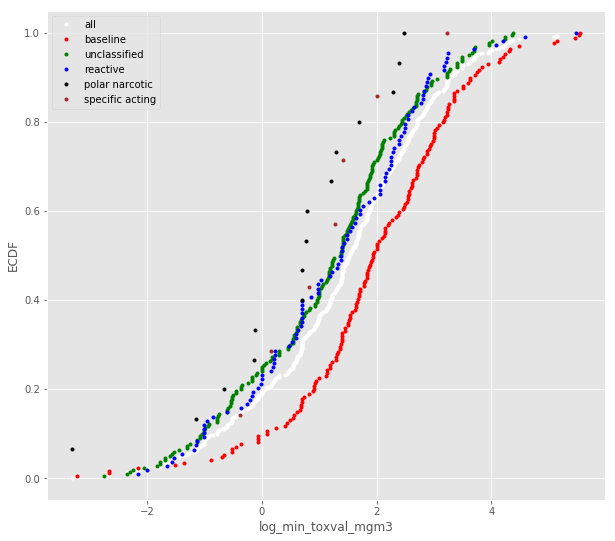

In [100]:
v1_logPODs = ttc_moa[ttc_moa['Verhaar'] == 'baseline_narcotic']['log_min_toxval_mgm3_adj']
v2_logPODs = ttc_moa[ttc_moa['Verhaar'] == 'unclassified']['log_min_toxval_mgm3_adj']
v3_logPODs = ttc_moa[ttc_moa['Verhaar'] == 'reactive']['log_min_toxval_mgm3_adj']
v4_logPODs = ttc_moa[ttc_moa['Verhaar'] == 'polar_narcotic']['log_min_toxval_mgm3_adj']
v5_logPODs = ttc_moa[ttc_moa['Verhaar'] == 'specific_acting']['log_min_toxval_mgm3_adj']
x_v1, y_v1 = ecdf(v1_logPODs)
x_v2, y_v2 = ecdf(v2_logPODs)
x_v3, y_v3 = ecdf(v3_logPODs)
x_v4, y_v4 = ecdf(v4_logPODs)
x_v5, y_v5 = ecdf(v5_logPODs)


all_logPODs = ttc_moa['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)

plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none', color = 'w', label = 'all')
plt.plot(x_v1, y_v1 , marker = '.', linestyle = 'none', color = 'r', label = 'baseline') # baseline
plt.plot(x_v2, y_v2 , marker = '.', linestyle = 'none', color = 'g', label = 'unclassified') # unclassified
plt.plot(x_v3, y_v3 , marker = '.', linestyle = 'none', color = 'b', label = 'reactive') # reactive
plt.plot(x_v4, y_v4 , marker = '.', linestyle = 'none', color = 'black', label = 'polar narcotic')
plt.plot(x_v5, y_v5 , marker = '.', linestyle = 'none', color = 'brown', label = 'specific acting')
plt.legend()
plt.xlabel('log_min_toxval_mgm3')
plt.ylabel('ECDF')
plt.savefig(figures_dir+'TBVerhaar_ECDFs.png', dpi = 300)

In [112]:
toxtree_verhaar = pd.read_csv(processed_dat_dir+'Verhaar_Toxtree.csv')

In [113]:
toxtree_verhaar.drop(['Kroes TTC decision tree',
       'Kroes TTC decision tree#explanation', 'SMILES', 'cdk:Remark', 'cdk:Title', 'genetox',
       'name'],axis =1, inplace = True)

In [114]:
toxtree_verhaar.head()

,DTXSID,Verhaar scheme,Verhaar scheme#explanation
0,DTXSID3020596,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3Y"
1,DTXSID2021284,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3Y"
2,DTXSID1020431,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4Y,1.4.1N,1.4.2Y"
3,DTXSID1021871,Class 5 (Not possible to classify according to...,"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4N,1.5N,1.6N,1..."
4,DTXSID5020029,Class 3 (unspecific reactivity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4N,1.5N,1.6Y,1..."


In [115]:
toxtree_verhaar['Verhaar_toxtree'] = toxtree_verhaar['Verhaar scheme'].map(verhaar_dict)

In [116]:
toxtree_verhaar.head()

,DTXSID,Verhaar scheme,Verhaar scheme#explanation,Verhaar_toxtree
0,DTXSID3020596,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3Y",baseline_narcotic
1,DTXSID2021284,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3Y",baseline_narcotic
2,DTXSID1020431,Class 1 (narcosis or baseline toxicity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4Y,1.4.1N,1.4.2Y",baseline_narcotic
3,DTXSID1021871,Class 5 (Not possible to classify according to...,"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4N,1.5N,1.6N,1...",unclassified
4,DTXSID5020029,Class 3 (unspecific reactivity),"0.1Y,0.2Y,0.3Y,1.1Y,1.2Y,1.3N,1.4N,1.5N,1.6Y,1...",reactive


In [117]:
ttc_moa_df = pd.merge(ttc_moa, toxtree_verhaar, on = 'DTXSID', how = 'left')

In [121]:
ttc_moa_df.drop(['Verhaar scheme',
       'Verhaar scheme#explanation'], axis = 1, inplace = True)

In [122]:
ttc_moa_df.head()

,DTXSID,min_toxval_mgm3_adj,Cramer_class,Aquatic_OASIS,Verhaar,log_min_toxval_mgm3_adj,Verhaar_toxtree
0,DTXSID0020315,0.005000,ClassIII,baseline_narcotic,unclassified,-2.301030,unclassified
1,DTXSID0020446,0.683333,ClassIII,baseline_narcotic,reactive,-0.165367,unclassified
2,DTXSID0021096,9.800000,ClassIII,reactive,unclassified,0.991226,unclassified
3,DTXSID0021381,550.382960,ClassIII,baseline_narcotic,baseline_narcotic,2.740665,baseline_narcotic
4,DTXSID0021383,24.750000,ClassIII,baseline_narcotic,baseline_narcotic,1.393575,baseline_narcotic


In [123]:
ttc_moa_df.Verhaar_toxtree.value_counts()

unclassified         241
baseline_narcotic    200
reactive              48
polar_narcotic        28
Name: Verhaar_toxtree, dtype: int64

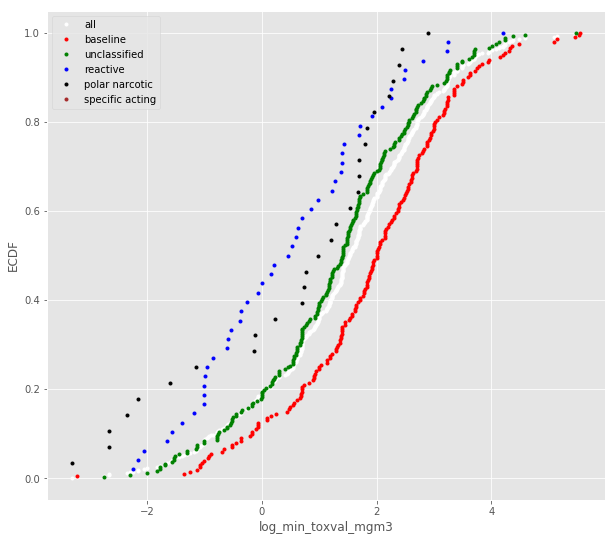

In [124]:
v1_logPODs = ttc_moa_df[ttc_moa_df['Verhaar_toxtree'] == 'baseline_narcotic']['log_min_toxval_mgm3_adj']
v2_logPODs = ttc_moa_df[ttc_moa_df['Verhaar_toxtree'] == 'unclassified']['log_min_toxval_mgm3_adj']
v3_logPODs = ttc_moa_df[ttc_moa_df['Verhaar_toxtree'] == 'reactive']['log_min_toxval_mgm3_adj']
v4_logPODs = ttc_moa_df[ttc_moa_df['Verhaar_toxtree'] == 'polar_narcotic']['log_min_toxval_mgm3_adj']
v5_logPODs = ttc_moa_df[ttc_moa_df['Verhaar_toxtree'] == 'specific_acting']['log_min_toxval_mgm3_adj']
x_v1, y_v1 = ecdf(v1_logPODs)
x_v2, y_v2 = ecdf(v2_logPODs)
x_v3, y_v3 = ecdf(v3_logPODs)
x_v4, y_v4 = ecdf(v4_logPODs)
x_v5, y_v5 = ecdf(v5_logPODs)


all_logPODs = ttc_moa['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)

plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none', color = 'w', label = 'all')
plt.plot(x_v1, y_v1 , marker = '.', linestyle = 'none', color = 'r', label = 'baseline') # baseline
plt.plot(x_v2, y_v2 , marker = '.', linestyle = 'none', color = 'g', label = 'unclassified') # unclassified
plt.plot(x_v3, y_v3 , marker = '.', linestyle = 'none', color = 'b', label = 'reactive') # reactive
plt.plot(x_v4, y_v4 , marker = '.', linestyle = 'none', color = 'black', label = 'polar narcotic')
plt.plot(x_v5, y_v5 , marker = '.', linestyle = 'none', color = 'brown', label = 'specific acting')
plt.legend()
plt.xlabel('log_min_toxval_mgm3')
plt.ylabel('ECDF')
plt.savefig(figures_dir+'Toxtree_Verhaar_ECDFs.png', dpi = 300)

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [129]:
ttc_moa_df['Verhaar'].value_counts(dropna = False)

unclassified         220
baseline_narcotic    169
reactive             108
polar_narcotic        15
specific_acting        7
Name: Verhaar, dtype: int64

In [133]:
ttc_moa_df['Verhaar_toxtree'].value_counts(dropna = False)
ttc_moa_df['Verhaar_toxtree'] = ttc_moa_df['Verhaar_toxtree'].replace(np.nan, 'Missing')

In [140]:
xticklabels = sorted(ttc_moa_df['Verhaar_toxtree'].unique())
yticklabels = sorted(ttc_moa_df['Verhaar_toxtree'].unique())

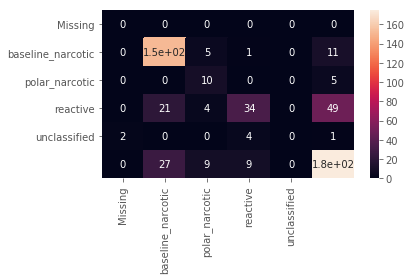

In [146]:
sns.heatmap(confusion_matrix(ttc_moa_df['Verhaar'], ttc_moa_df['Verhaar_toxtree'] ),xticklabels = xticklabels, yticklabels = yticklabels , annot = True)
plt.tight_layout()
plt.savefig(figures_dir+'hm_verhaar.png', dpi = 300)

In [135]:
print(classification_report(ttc_moa_df['Verhaar'], ttc_moa_df['Verhaar_toxtree']))

                   precision    recall  f1-score   support

          Missing       0.00      0.00      0.00         0
baseline_narcotic       0.76      0.90      0.82       169
   polar_narcotic       0.36      0.67      0.47        15
         reactive       0.71      0.31      0.44       108
  specific_acting       0.00      0.00      0.00         7
     unclassified       0.73      0.80      0.76       220

      avg / total       0.71      0.71      0.69       519



/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/grace/anaconda3/envs/clone_newchem/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [147]:
ttc_moa_df['OASIS_v2'] = ttc_moa_df.Aquatic_OASIS.map({'baseline_narcotic' : 'baseline_narcotic', 'reactive': 'reactive','esters': 'polar_narcotic', 'narcotic_amine': 'polar_narcotic', 'other': 'polar_narcotic'})

In [148]:
consensus = []
for x,y,z in list(zip(ttc_moa_df['Verhaar_toxtree'],ttc_moa_df['Verhaar'],ttc_moa_df['OASIS_v2'])):
    if x == y:
        consensus.append(x)
    elif x != y:
        if x == 'specific_acting' or y == 'specific_acting':
            consensus.append('specific_acting')
        elif x == 'reactive' or y == 'reactive':
            consensus.append('reactive')
        elif x == 'polar_narcotic' or y == 'polar_narcotic':
            consensus.append('polar_narcotic')
        elif x == 'baseline_narcotic' or y == 'baseline_narcotic':
            consensus.append('baseline_narcotic')
        else:
            consensus.append('unclassified')
    

In [149]:
ttc_moa_df['consensus_MOA'] = consensus

In [151]:
ttc_moa_df.consensus_MOA.value_counts()

baseline_narcotic    190
unclassified         175
reactive             118
polar_narcotic        29
specific_acting        7
Name: consensus_MOA, dtype: int64

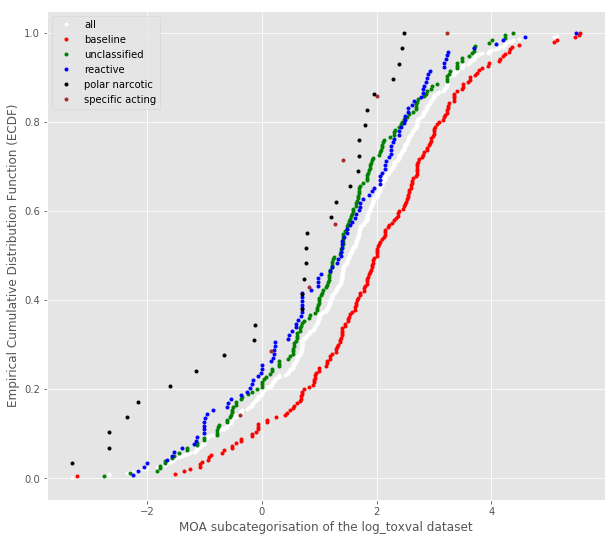

In [153]:
cbn_logPODs = ttc_moa_df[ttc_moa_df['consensus_MOA'] == 'baseline_narcotic']['log_min_toxval_mgm3_adj']
cun_logPODs = ttc_moa_df[ttc_moa_df['consensus_MOA'] == 'unclassified']['log_min_toxval_mgm3_adj']
cr_logPODs = ttc_moa_df[ttc_moa_df['consensus_MOA'] == 'reactive']['log_min_toxval_mgm3_adj']
cpr_logPODs = ttc_moa_df[ttc_moa_df['consensus_MOA'] == 'polar_narcotic']['log_min_toxval_mgm3_adj']
csa_logPODs = ttc_moa_df[ttc_moa_df['consensus_MOA'] == 'specific_acting']['log_min_toxval_mgm3_adj']
x_cn1, y_cn1 = ecdf(cbn_logPODs)
x_cn2, y_cn2 = ecdf(cun_logPODs)
x_cn3, y_cn3 = ecdf(cr_logPODs)
x_cn4, y_cn4 = ecdf(cpr_logPODs)
x_cn5, y_cn5 = ecdf(csa_logPODs)


all_logPODs = ttc_moa_df['log_min_toxval_mgm3_adj']
x_all, y_all = ecdf(all_logPODs)

plt.figure(figsize = (10,9))
plt.plot(x_all, y_all , marker = '.', linestyle = 'none', color = 'w', label = 'all')
plt.plot(x_cn1, y_cn1 , marker = '.', linestyle = 'none', color = 'r', label = 'baseline') # baseline
plt.plot(x_cn2, y_cn2 , marker = '.', linestyle = 'none', color = 'g', label = 'unclassified') # unclassified
plt.plot(x_cn3, y_cn3, marker = '.', linestyle = 'none', color = 'b', label = 'reactive') # reactive
plt.plot(x_cn4, y_cn4 , marker = '.', linestyle = 'none', color = 'black', label = 'polar narcotic')
plt.plot(x_cn5, y_cn5 , marker = '.', linestyle = 'none', color = 'brown', label = 'specific acting')
plt.legend()
# Label the axes
plt.xlabel('MOA subcategorisation of the log_toxval dataset')
plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
plt.savefig(figures_dir+'consensus_ecdf.png', dpi = 300)

In [154]:
from scipy.stats import ks_2samp

In [155]:
print(ks_2samp(cbn_logPODs, cr_logPODs)) # baseline and reactive

Ks_2sampResult(statistic=0.22051739518287244, pvalue=0.0013487470471625657)


In [157]:
alpha = 0.05
res = ks_2samp(cbn_logPODs, cr_logPODs)
if res[1] < alpha:
    print('dists are different')

dists are different


In [158]:
bs_replicates_bn = draw_bs_reps(cbn_logPODs, np.percentile, size = 10000)

In [159]:
bs_replicates_cr = draw_bs_reps(cr_logPODs, np.percentile, size = 10000)

In [164]:
median_thresh = 10**np.median(bs_replicates_bn)
conf_int = 10**np.percentile(bs_replicates_bn, [2.5,97.5])
print('95% confidence interval = ', conf_int)
print('median = ', median_thresh)

95% confidence interval =  [0.08514127 0.53201846]
median =  0.15673364082099908


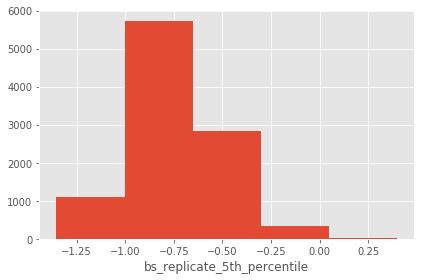

In [165]:
plt.hist(bs_replicates_bn, bins = 5)
plt.xlabel('bs_replicate_5th_percentile')
plt.tight_layout()

In [167]:
median_thresh_cr = 10**np.median(bs_replicates_cr)
conf_int_cr = 10**np.percentile(bs_replicates_cr, [2.5,97.5])
print('95% confidence interval = ', conf_int_cr)
print('median = ', median_thresh_cr)

95% confidence interval =  [0.00876346 0.09814286]
median =  0.029999999999999995


In [168]:

d = (6/24)*(5/7)
V = 20
bw = 60

TTC_bn = (median_thresh * d)/(10*2.5)
print(TTC_bn)

TTC_cr = (median_thresh_cr * d)/(10*2.5)

print(TTC_cr)

0.0011195260058642791
0.00021428571428571425


In [173]:
NOEL_bn = (median_thresh*d) * (V/bw)*1000
NOEL_cr = (median_thresh_cr*d) * (V/bw)*1000

In [174]:
TTC_bn_d = (NOEL_bn*bw)/(10*2.5)
TTC_cr_d = (NOEL_cr*bw)/(10*2.5)
print(TTC_bn_d)
print(TTC_cr_d)

22.39052011728558
4.285714285714285


### Threshold = 5thpercentileNOEC x dexp/(10*2.5) where 2.5 is an uncertainty factor and 10 is an interdividual variation dexp - 6/24 X 5/7 d to adjust for 6h/d on 5d/week for animal studies to 24hr exposure over 7 days




###NOEL (ug/kg/d) = 5th percentil NOEC(mg/m3) x desp x (Vres m3/d/bw kg) x 1000
###Threshold ug/person/d) = NOEL x bw/10*2.5

In [283]:
def try_join(l):
    try:
        return ','.join(map(str,l))
    except TypeError:
        return np.nan
    

In [175]:
writer = pd.ExcelWriter(processed_dat_dir+'ttc_moa_v1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
ttc_moa_df.to_excel(writer, sheet_name = 'ttc_moa_v1')


writer.save()